WARNING:

"fitting_parameters.h5" need to be in the directory you are working on
or there will be an error for importing mr_forecast in the next cell.

If you don't want the file in this directory,
change the mr_forecast.py line 16

hyper_file = 'fitting_parameters.h5' 

->

hyper_file = [directory of fitting parameter file]+'fitting_parameters.h5'

In [1]:
import numpy as np
import mr_forecast as mr
import matplotlib.pyplot as plt
%matplotlib inline

================================

predict the mean and std of radius given those of the mass

In [2]:
Rmean, Rstd = mr.Mstat2R(mean=1.0, std=0.1, unit='Earth', sample_size=100)

Assuming normal distribution truncated at the mass range limit of the model.


In [3]:
Rmean, Rstd

(1.0110655067824927, 0.11106395632373284)

================================

predict a vector of radius given a vector of mass

In [4]:
M1 = np.loadtxt('demo_mass.dat')
R1 = mr.Mpost2R(M1, unit='Earth')

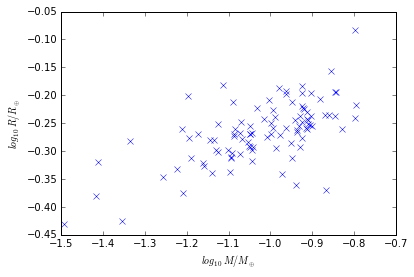

In [5]:
plt.plot(np.log10(M1), np.log10(R1), 'bx')
plt.xlabel(r'$log_{10}\ M/M_{\oplus}$')
plt.ylabel(r'$log_{10}\ R/R_{\oplus}$')
plt.show()

================================

predict the mean and std of mass given those of the radius

In [6]:
Mmean, Mstd = mr.Rstat2M(mean=0.1, std=0.01, unit='Jupiter', sample_size=100, grid_size=1e3)

Assuming normal distribution truncated from zero on.


In [7]:
Mmean, Mstd

(0.005120470482593612, 0.0030190673397036574)

================================

predict a vector of mass given a vector of radius

In [8]:
R2 = np.loadtxt('demo_radius.dat')
M2 = mr.Rpost2M(R2, unit='Earth', grid_size=1e3)

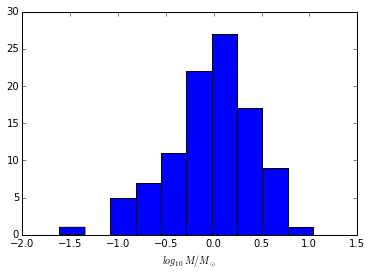

In [9]:
plt.hist(np.log10(M2))
plt.xlabel(r'$log_{10}\ M/M_{\odot}$')
plt.show()